In [1]:
import pandas as pd

In [2]:
df_giornali = pd.read_excel('giornali_processed_cleaned_final.xlsx')
df_giornali

,index,title,text,date_cleaned,giornale
0,0,"Indice di vivibilità climatica, la città più v...","Zero giorni freddi, 73 notti tropicali con 11 ...",2024-06-19,Corriere Della Sera
1,1,"Roma, indice di vivibilità climatica: la Capit...",Il 2023 è stato un anno decisamente caldo per ...,2024-06-19,Corriere Della Sera
2,2,"Clima e vivibilità delle città, Verona sorpass...","Il riscaldamento globale bastona il Veneto, ch...",2024-06-19,Corriere Della Sera
3,3,"Milano, indice di vivibilità climatica 2023: a...",L’intuito porterebbe a pensare che più sono i ...,2024-06-19,Corriere Della Sera
4,4,"Puglia, indice di vivibilità climatica: a Tara...",La città di Brindisi è stata la più vivibile d...,2024-06-19,Corriere Della Sera
...,...,...,...,...,...
3420,3420,"Vaiolo delle scimmie, l'epidemia si espande in...",I bambini e gli adolescenti di età inferiore a...,2024-08-24,La Repubblica
3421,3421,"Le pagelle di Roma-Empoli: Paredes disastroso,...",Promossi e bocciati della gara dell’Olimpico\n...,2024-08-25,La Repubblica
3422,3422,Inizia la vendemmia Ai vignaioli linee guida c...,\ndi Marta Borghese A determinare la qualità d...,2024-08-26,La Repubblica
3423,3423,"Scuola, rientro in classi bollenti. La denunci...",Sono solo 15mila in tutti gli edifici scolasti...,2024-08-26,La Repubblica


In [3]:
#verbi e stopwords
parole_da_eliminare = set()

with open('coniugazione_verbi.txt', 'r', encoding='utf-8') as file:
    verbi = file.readlines()
with open('stopwords-it.txt', 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
with open('nomi_italiani.txt', 'r', encoding='utf-8') as file:
    nomi = file.readlines()

congiunzioni = pd.read_excel('congiunzioni.xlsx')
congiunzioni = set(congiunzioni['congiunzioni'])
avverbi = pd.read_excel('avverbi.xlsx')
avverbi = set(avverbi['avverbi'])
nomi_da_eliminare = set(nomi)

for word in verbi:
    parole_da_eliminare.add(word.replace('\n',''))
for word in stopwords:
    parole_da_eliminare.add(word.replace('\n',''))
for word in nomi:
    parole_da_eliminare.add(word.replace('\n',''))
for word in congiunzioni:
    parole_da_eliminare.add(word.replace(' ',''))
for word in avverbi:
    parole_da_eliminare.add(word.replace(' ',''))
#for word in parole_giornale:
#    parole_da_eliminare.add(word.replace(' ',''))
parole_da_eliminare

{'rimenerà',
 'romanzasse',
 'assoggetterebbe',
 'torei',
 'falliscano',
 'riapparirà',
 'aderito',
 'personificato',
 'appulcravi',
 'ricanalizzavi',
 'storneranno',
 'affiori',
 'soscriviamo',
 'effemino',
 'radduci',
 'giustapponevo',
 'forwardammo',
 'disseminate',
 'allucciolasti',
 'centellinassimo',
 'granulavo',
 'derubrichiamo',
 'rinviliscono',
 'studieremo',
 'ammencite',
 'estranieresti',
 'affuocassero',
 'cinematografare',
 'compiacersi',
 'ormavamo',
 'vandalizzerai',
 'insorgeranno',
 'giungiate',
 'riporteranno',
 'presserebbero',
 'rincrudiva',
 'zincaste',
 'altalenassimo',
 'oneglio',
 'dirozzeremmo',
 'impiegati',
 'rincingerai',
 'antergheresti',
 'elettrolizza',
 'disincagliavi',
 'laconizzeresti',
 'scrutinerò',
 'penzolasse',
 'mortificavate',
 'concorse',
 'separavi',
 'persuaderesti',
 'incalcinerei',
 'terziavi',
 'ottimizzasse',
 'precede',
 'memorizzasti',
 'onorerà',
 'prolungassi',
 'guadalupe',
 'abbozzolato',
 'atticizzerebbero',
 'graverei',
 'rinserr

In [4]:
def valid_token(string):
    return string.lower() not in parole_da_eliminare and len(string) > 3 and not any(char.isdigit() for char in string)

def delete_parole_giornali(text, lista_parole):
    for parola in lista_parole:
        text = text.lower().replace(parola, '')
    return text

In [5]:
### VERSIONE 2: ELIMINO NOMI, NON TOKENIZZO NOME INTERO. TOLGO MAIUSCOLA DOPO PUNTO ###
#faccio pulizia: elimino tutta la punteggiatura e i caratteri speciali e salvo testo pulito in una lista
import re

parole_giornale = ['corriere','corriere della sera','siccità','riproduzione riservata','newsletter','iscriviti','fatto quotidiano','hhhh','hhhhh','ilfattoquotidiano\.it','@repubblica\.it','bisogna','©riproduzione']
#regex_old = r'[«»,!?:()\[\]\'’;"“”\n–—–\d+-]'
regex = r"[:;!?.,«»,()\[\]'’\"\n\t“”\-_]"
#regex_lowercase_after_period = r'(?<=[.!?;,:])\s*\w+'
bodies_cleaned = []
persons_total =  set()
body_cleaned_lemmatized = []
bodies_tokenized = []
bodies = list(df_giornali['text'])
for body in bodies:
    #pulisco testo
    body = delete_parole_giornali(body,parole_giornale)
    body_cleaned = re.sub(regex, ' ', body)
    #body_cleaned = re.sub(regex_lowercase_after_period, lambda match: match.group(0).lower(), body_cleaned)
    tokens = []
    #creo i lemmi
    for single_word in body_cleaned.split(' '):
        if valid_token(single_word):
            tokens.append(single_word.lower().strip())
    bodies_tokenized.append(tokens)
bodies_tokenized

[['zero',
  'notti',
  'tropicali',
  'caldo',
  'estremo',
  'eventi',
  'estremi',
  'bologna',
  'tanti',
  'forniti',
  'annuale',
  'sera',
  'collaborazione',
  'ilmeteo',
  'vivibilità',
  'climatica',
  'italiane',
  'diversi',
  'calore',
  'tanti',
  'capoluoghi',
  'miglior',
  'benessere',
  'climatico',
  'incidenza',
  'cambiamenti',
  'climatici',
  'essersi',
  'aggiudicata',
  'vivibile',
  'nuovamente',
  'biella',
  'agrigento',
  'bologna',
  'metà',
  'gara',
  'romagna',
  'vivibile',
  'nazionale',
  'fanalino',
  'coda',
  'torri',
  'indagine',
  'miglioramento',
  'eccezione',
  'grandi',
  'italiane',
  'eccetto',
  'bologna',
  'nord',
  'bologna',
  'zero',
  'trend',
  'discesa',
  'decina',
  'parimenti',
  'caduta',
  'fenomeni',
  'estremi',
  'superiori',
  'occorrenza',
  'eventi',
  'estremi',
  'precipitazioni',
  'raffiche',
  'vento',
  'orari',
  'precedenti',
  'edizioni',
  'eventi',
  'estremi',
  'tedici',
  'meteorologo',
  'responsabile',
 

In [6]:
#importo librerie per kmeans e word2vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import normalize

In [7]:
model = Word2Vec(sentences=bodies_tokenized, vector_size=300, window=10, min_count=15,epochs = 20, workers=4)

words = list(model.wv.index_to_key)  # Lista delle parole nel vocabolario
word_vectors = np.array([model.wv[word] for word in words])  # Matrice dei vettori delle parole
word_vectors_normalized = normalize(word_vectors)

In [8]:
#test parole più simili
word = "riservata"

# Numero di parole simili da trovare
n = 30

# Verifica se la parola è nel vocabolario del modello
if word in model.wv.key_to_index:
    # Trova le n parole più simili
    similar_words = model.wv.most_similar(word, topn=n)
    
    # Stampa le parole simili e i punteggi di similarità
    for similar_word, similarity in similar_words:
        print(f"{similar_word}, : {similarity}")
else:
    print(f"La parola '{word}' non è presente nel vocabolario del modello.")

La parola 'riservata' non è presente nel vocabolario del modello.


3
4
5
6
7
8
9
10
11
12
13
14
[3816.3779296875, 3654.206787109375, 3539.27392578125, 3443.390869140625, 3352.915771484375, 3282.171875, 3226.502685546875, 3178.5537109375, 3135.3720703125, 3095.26708984375, 3064.1904296875, 3026.964111328125]


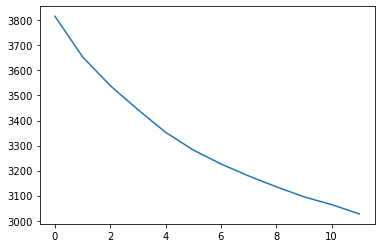

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

#metodo del gomito per trovare numero ottimale clusters
wcss = []
word_vectors_normalized = normalize(word_vectors)

for num_clusters in range(3,15):
    print(num_clusters)
    clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
    clusters = clustering_model.fit_predict(word_vectors_normalized)
    wcss.append(clustering_model.inertia_)

#non abbiamo un vero "gomito", ma la differenza di wcss si fa poco marcata (< 3) dopo l'8 cluster. prendo 8
print(wcss)
plt.plot(wcss)

In [10]:
# clustering
num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clusters = clustering_model.fit_predict(word_vectors_normalized)
pd.DataFrame(clusters).value_counts()

7    793
0    688
2    669
6    650
1    551
3    515
5    439
4    385
dtype: int64

In [11]:
#UMAP
import umap
import numpy as np


# Create a UMAP object with cosine as the metric
umap_model = umap.UMAP(metric='cosine', n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
embedding = umap_model.fit_transform(word_vectors_normalized)

In [12]:
df_words = pd.DataFrame(words)
df_words['cluster'] = clusters
df_words['0'] = embedding[:, 0]
df_words['1'] = embedding[:, 1]
columns = ['words','cluster','umap_x','umap_y']
df_words.columns = columns

In [13]:
#creo datframe con mapping parole-articolo
df_giornali_final = df_giornali
df_words_article = pd.DataFrame()
df_giornali_final['words'] = bodies_tokenized
df_giornali_exploded = df_giornali_final.explode('words')
df_words_article['index'] = df_giornali_exploded['index']
df_words_article['words'] = df_giornali_exploded['words']

df_words_article_cluster = pd.merge(df_words_article, df_words, on='words', how='left')
df_words_article_cluster['cluster'] = df_words_article_cluster['cluster'].fillna(-1)
df_giornali_final

,index,title,text,date_cleaned,giornale,words
0,0,"Indice di vivibilità climatica, la città più v...","Zero giorni freddi, 73 notti tropicali con 11 ...",2024-06-19,Corriere Della Sera,"[zero, notti, tropicali, caldo, estremo, event..."
1,1,"Roma, indice di vivibilità climatica: la Capit...",Il 2023 è stato un anno decisamente caldo per ...,2024-06-19,Corriere Della Sera,"[caldo, capitale, darne, inverno, settimana, e..."
2,2,"Clima e vivibilità delle città, Verona sorpass...","Il riscaldamento globale bastona il Veneto, ch...",2024-06-19,Corriere Della Sera,"[riscaldamento, globale, vivibilità, climatica..."
3,3,"Milano, indice di vivibilità climatica 2023: a...",L’intuito porterebbe a pensare che più sono i ...,2024-06-19,Corriere Della Sera,"[caldo, cambiamenti, climatici, vivibilità, cl..."
4,4,"Puglia, indice di vivibilità climatica: a Tara...",La città di Brindisi è stata la più vivibile d...,2024-06-19,Corriere Della Sera,"[brindisi, vivibile, puglia, climatico, tarant..."
...,...,...,...,...,...,...
3420,3420,"Vaiolo delle scimmie, l'epidemia si espande in...",I bambini e gli adolescenti di età inferiore a...,2024-08-24,La Repubblica,"[bambini, adolescenti, inferiore, casi, piccol..."
3421,3421,"Le pagelle di Roma-Empoli: Paredes disastroso,...",Promossi e bocciati della gara dell’Olimpico\n...,2024-08-25,La Repubblica,"[bocciati, gara, olimpico, svilar, guanti, mag..."
3422,3422,Inizia la vendemmia Ai vignaioli linee guida c...,\ndi Marta Borghese A determinare la qualità d...,2024-08-26,La Repubblica,"[borghese, qualità, piemontese, meteo, caldo, ..."
3423,3423,"Scuola, rientro in classi bollenti. La denunci...",Sono solo 15mila in tutti gli edifici scolasti...,2024-08-26,La Repubblica,"[edifici, scolastici, presidenze, segreterie, ..."


In [14]:
#conto per ogni articolo quante parole ha per cluster
from collections import Counter
counters = []
df_grouped_str = df_words_article_cluster.groupby('index')['cluster'].agg(list).reset_index()
for clusters in df_grouped_str['cluster']:
    counters.append(Counter(clusters))

#calcolo percentuale parole per articolo e cluster
df_count_word_cluster = pd.DataFrame(counters)
df_count_word_cluster['total_words'] = df_count_word_cluster.sum(axis = 1)
df_count_word_cluster_perc = df_count_word_cluster.iloc[:, :-1].div(df_count_word_cluster['total_words'], axis=0)
df_count_word_cluster_perc

,0.0,2.0,7.0,5.0,6.0,1.0,4.0,-1.0,3.0
0,0.517241,0.158621,0.068966,0.013793,0.089655,0.068966,0.027586,0.055172,NaN
1,0.547368,0.031579,0.042105,0.021053,0.052632,0.063158,0.021053,0.221053,NaN
2,0.644809,0.054645,0.027322,NaN,0.081967,0.060109,0.010929,0.098361,0.021858
3,0.436170,0.085106,0.074468,0.042553,0.010638,0.127660,0.042553,0.138298,0.042553
4,0.508287,0.165746,0.022099,0.005525,0.038674,0.066298,0.055249,0.132597,0.005525
...,...,...,...,...,...,...,...,...,...
3420,0.110599,0.023041,0.032258,0.216590,0.188940,0.152074,0.009217,0.211982,0.055300
3421,0.039683,0.047619,0.150794,NaN,0.031746,0.023810,0.023810,0.642857,0.039683
3422,0.201550,0.038760,0.023256,0.007752,0.077519,0.031008,0.426357,0.147287,0.046512
3423,0.224242,0.115152,0.121212,0.048485,0.151515,0.060606,0.018182,0.254545,0.006061


In [15]:
df_count_word_cluster_perc_pivot = pd.melt(df_count_word_cluster_perc.reset_index(), id_vars = ['index'], var_name='cluster_article', value_name='perc_words_cluster').sort_values('index')
df_count_word_cluster_perc_pivot['perc_words_cluster'] = df_count_word_cluster_perc_pivot['perc_words_cluster'] .fillna(0)
df_count_word_cluster_perc_pivot

,index,cluster_article,perc_words_cluster
0,0,0.0,0.517241
23975,0,-1.0,0.055172
6850,0,7.0,0.068966
10275,0,5.0,0.013793
13700,0,6.0,0.089655
...,...,...,...
3424,3424,0.0,0.057971
23974,3424,4.0,0.057971
6849,3424,2.0,0.043478
20549,3424,1.0,0.036232


In [16]:
df_count_word_cluster_perc[0:1]

,0.0,2.0,7.0,5.0,6.0,1.0,4.0,-1.0,3.0
0,0.517241,0.158621,0.068966,0.013793,0.089655,0.068966,0.027586,0.055172,NaN


In [17]:
df_count_word_cluster_perc_pivot[df_count_word_cluster_perc_pivot['index']==0]

,index,cluster_article,perc_words_cluster
0,0,0.0,0.517241
23975,0,-1.0,0.055172
6850,0,7.0,0.068966
10275,0,5.0,0.013793
13700,0,6.0,0.089655
17125,0,1.0,0.068966
27400,0,3.0,0.000000
20550,0,4.0,0.027586
3425,0,2.0,0.158621


In [18]:
df_giornali_final.to_excel('giornali_tableau.xlsx')
df_count_word_cluster_perc_pivot.to_excel('giornali_clusters_tableau.xlsx')
df_words_article_cluster.to_excel('words_tableau.xlsx')